In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create the .kaggle directory
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)

# Moving the kaggle.json file to the .kaggle directory
with open('kaggle.json') as f:
    kaggle_creds = json.load(f)
with open(os.path.expanduser('~/.kaggle/kaggle.json'), 'w') as f:
    json.dump(kaggle_creds, f)

# Set the permissions
os.chmod(os.path.expanduser('~/.kaggle/kaggle.json'), 0o600)


In [2]:
# Define the Kaggle dataset you want to download
dataset = 'olistbr/brazilian-ecommerce'

# Use Kaggle API to download the dataset
!kaggle datasets download -d {dataset} --unzip

Dataset URL: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
License(s): CC-BY-NC-SA-4.0




  0%|          | 0.00/42.6M [00:00<?, ?B/s]
  2%|2         | 1.00M/42.6M [00:00<00:04, 9.33MB/s]
 12%|#1        | 5.00M/42.6M [00:00<00:01, 23.1MB/s]
 21%|##1       | 9.00M/42.6M [00:00<00:01, 28.5MB/s]
 28%|##8       | 12.0M/42.6M [00:00<00:01, 28.2MB/s]
 38%|###7      | 16.0M/42.6M [00:00<00:00, 29.5MB/s]
 47%|####6     | 20.0M/42.6M [00:00<00:00, 31.3MB/s]
 56%|#####6    | 24.0M/42.6M [00:00<00:00, 32.6MB/s]
 66%|######5   | 28.0M/42.6M [00:00<00:00, 32.5MB/s]
 75%|#######5  | 32.0M/42.6M [00:01<00:00, 34.2MB/s]
 84%|########4 | 36.0M/42.6M [00:01<00:00, 34.5MB/s]
 94%|#########3| 40.0M/42.6M [00:01<00:00, 33.6MB/s]
100%|##########| 42.6M/42.6M [00:01<00:00, 31.3MB/s]


In [3]:
import pandas as pd

# Load datasets
customers = pd.read_csv('olist_customers_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')

# Verify data loading by printing the first few rows of one DataFrame
print(customers.head())


                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  


In [4]:
# Function to remove duplicates and show missing values
def remove_duplicates(df, name):
    print(f"\n--- {name} ---")
    print(f"Shape before removing duplicates: {df.shape}")
    df = df.drop_duplicates()
    print(f"Shape after removing duplicates: {df.shape}")
    return df

# Clear all duplicates
customers = remove_duplicates(customers, "Customers")
orders = remove_duplicates(orders, "Orders")
order_items = remove_duplicates(order_items, "Order Items")
payments = remove_duplicates(payments, "Payments")
reviews = remove_duplicates(reviews, "Reviews")
products = remove_duplicates(products, "Products")
sellers = remove_duplicates(sellers, "Sellers")



--- Customers ---
Shape before removing duplicates: (99441, 5)
Shape after removing duplicates: (99441, 5)

--- Orders ---
Shape before removing duplicates: (99441, 8)
Shape after removing duplicates: (99441, 8)

--- Order Items ---
Shape before removing duplicates: (112650, 7)
Shape after removing duplicates: (112650, 7)

--- Payments ---
Shape before removing duplicates: (103886, 5)
Shape after removing duplicates: (103886, 5)

--- Reviews ---
Shape before removing duplicates: (99224, 7)
Shape after removing duplicates: (99224, 7)

--- Products ---
Shape before removing duplicates: (32951, 9)
Shape after removing duplicates: (32951, 9)

--- Sellers ---
Shape before removing duplicates: (3095, 4)
Shape after removing duplicates: (3095, 4)


In [5]:
# Function to display missing values for all columns
def display_missing_values(df, name):
    print(f"\n--- {name} ---")
    print("Missing Values:")
    print(df.isnull().sum())

# Display missing values
display_missing_values(customers, "Customers")
display_missing_values(orders, "Orders")
display_missing_values(order_items, "Order Items")
display_missing_values(payments, "Payments")
display_missing_values(reviews, "Reviews")
display_missing_values(products, "Products")
display_missing_values(sellers, "Sellers")



--- Customers ---
Missing Values:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

--- Orders ---
Missing Values:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

--- Order Items ---
Missing Values:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

--- Payments ---
Missing Values:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

--- Reviews ---
Missing Values:
review_id         

In [6]:
# Convert date columns to datetime format
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], errors='coerce')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], errors='coerce')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], errors='coerce')
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'], errors='coerce')
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'], errors='coerce')

In [7]:
# Function to impute missing values
def impute_missing_values(df, numerical_columns, categorical_columns):
    for column in numerical_columns:
        df[column].fillna(df[column].median(), inplace=True)
    for column in categorical_columns:
        df[column].fillna(df[column].mode()[0], inplace=True)
    return df

# Identify columns to impute
orders_numerical = ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']
products_numerical = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty']
products_categorical = ['product_category_name']

# Impute missing values
orders = impute_missing_values(orders, orders_numerical, [])
products = impute_missing_values(products, products_numerical, products_categorical)
# Drop rows with missing values in the products table
products.dropna( inplace=True)

# Verify the changes
display_missing_values(orders, "Orders")
display_missing_values(products, "Products")




--- Orders ---
Missing Values:
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

--- Products ---
Missing Values:
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


C:\Users\Dheer Shah\AppData\Local\Temp\ipykernel_9532\4003553849.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\Dheer Shah\AppData\Local\Temp\ipykernel_9532\4003553849.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [8]:
# Handling Missing values in Reviews table
display_missing_values(reviews, "Reviews")
# Dropping columns with high percentage missing values in Reviews table
reviews.drop(columns=['review_comment_title', 'review_comment_message'], inplace=True)
# Verify the changes
display_missing_values(reviews, "Reviews")



--- Reviews ---
Missing Values:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

--- Reviews ---
Missing Values:
review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


In [9]:
# Merging datasets
final_dataset = pd.merge(orders, customers, on='customer_id', how='inner')
final_dataset = pd.merge(final_dataset, order_items, on='order_id', how='inner')
final_dataset = pd.merge(final_dataset, payments, on='order_id', how='inner')
final_dataset = pd.merge(final_dataset, reviews, on='order_id', how='left')
final_dataset = pd.merge(final_dataset, products, on='product_id', how='inner')
final_dataset = pd.merge(final_dataset, sellers, on='seller_id', how='inner')
print(final_dataset.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21

# Handling Outliers

In [10]:
# Identifying Numerical Columns 
numerical_columns = final_dataset.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Columns:", numerical_columns)

Numerical Columns: Index(['customer_zip_code_prefix', 'order_item_id', 'price', 'freight_value',
       'payment_sequential', 'payment_installments', 'payment_value',
       'review_score', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix'],
      dtype='object')


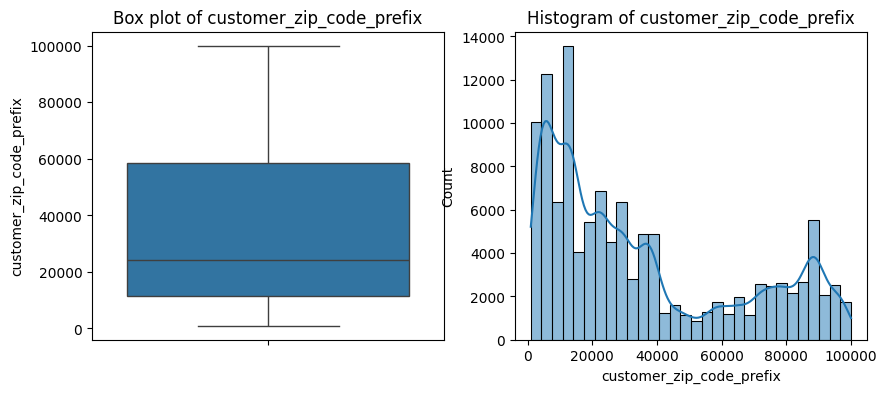

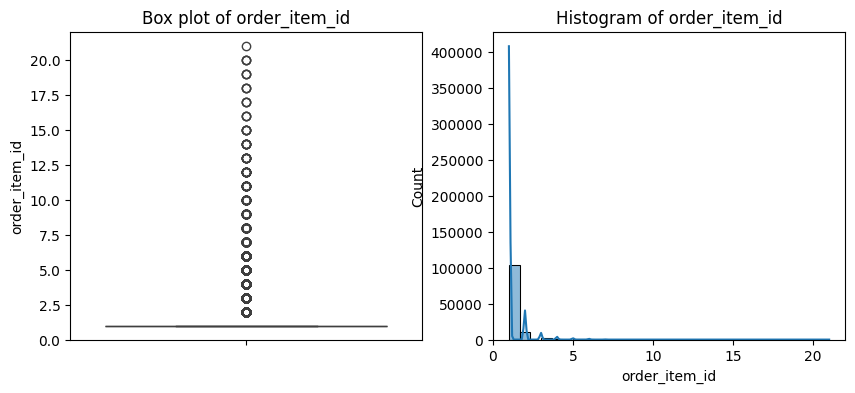

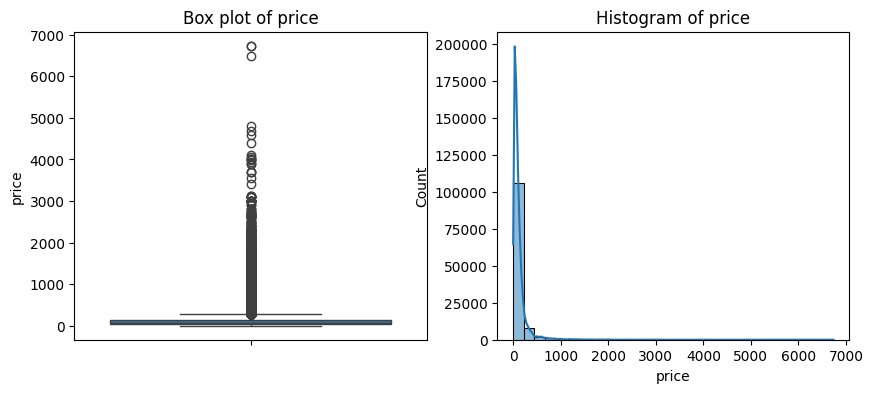

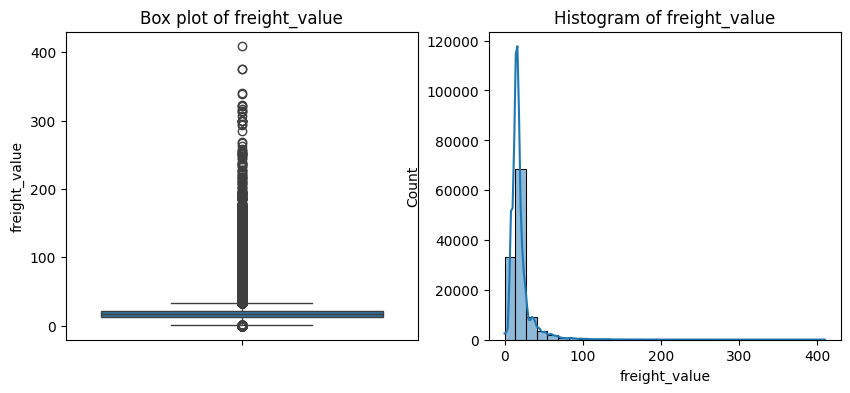

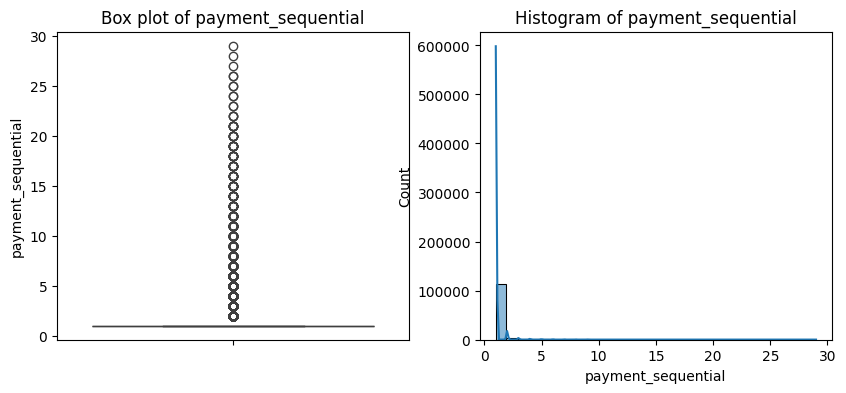

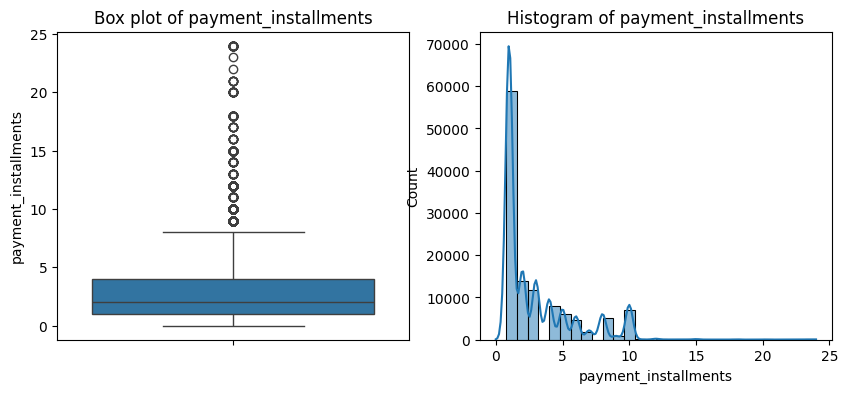

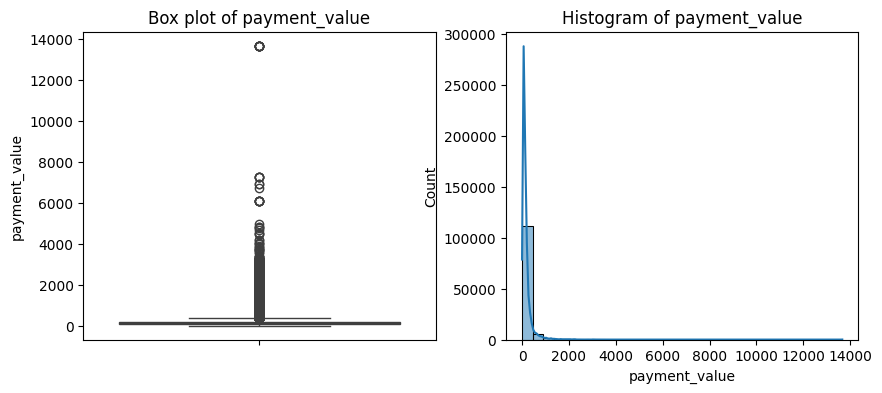

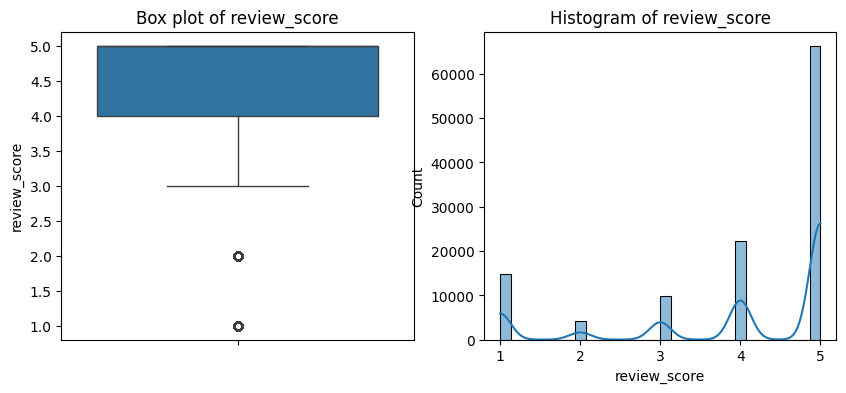

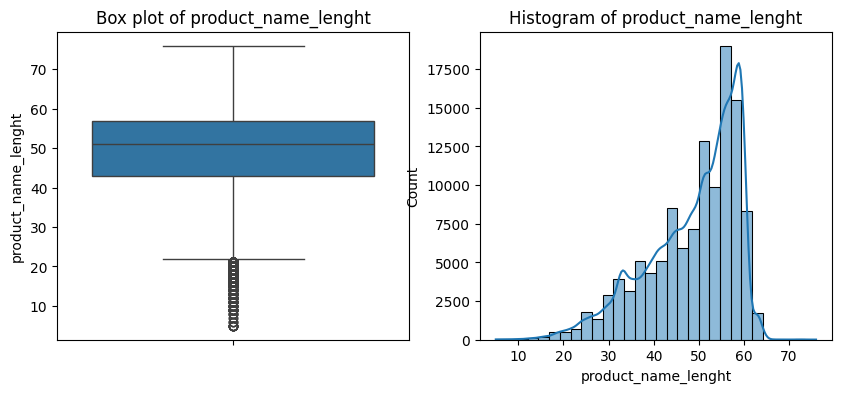

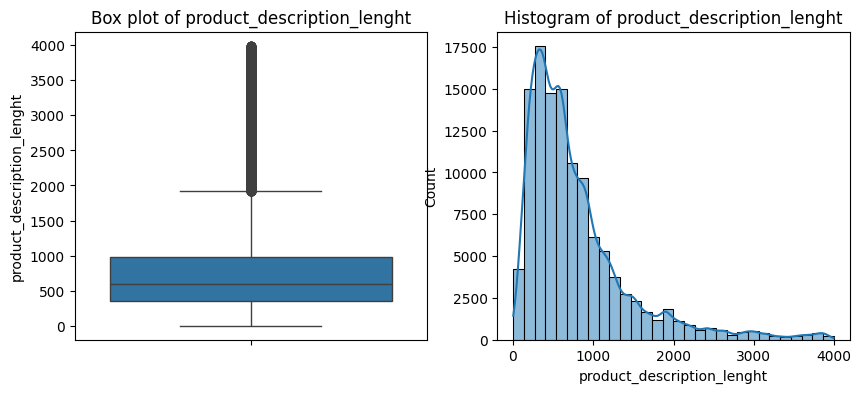

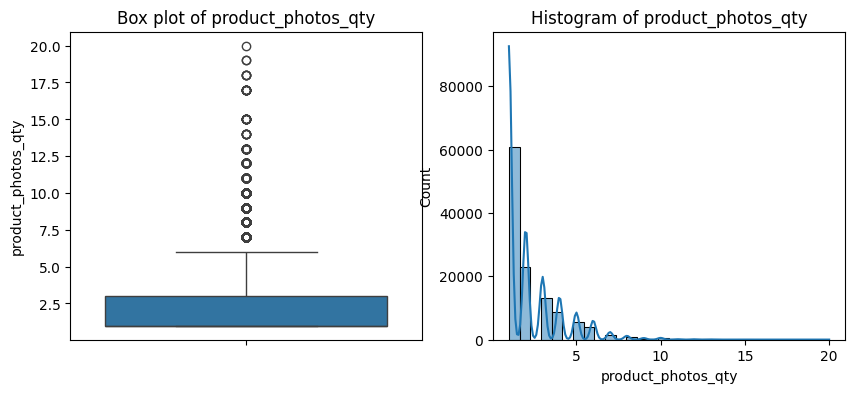

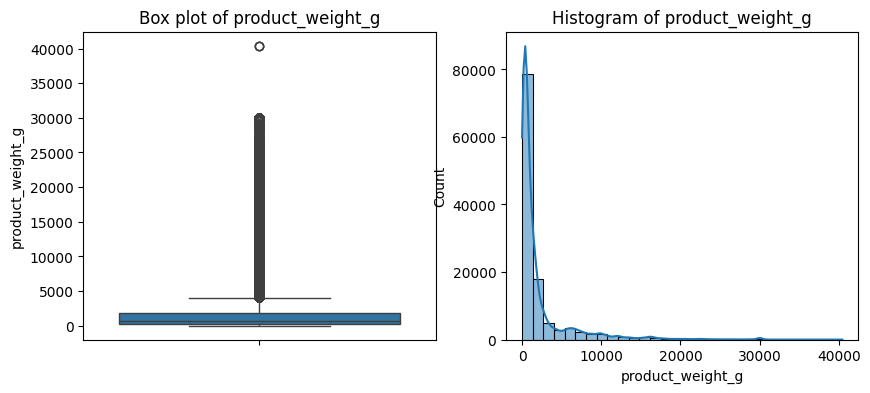

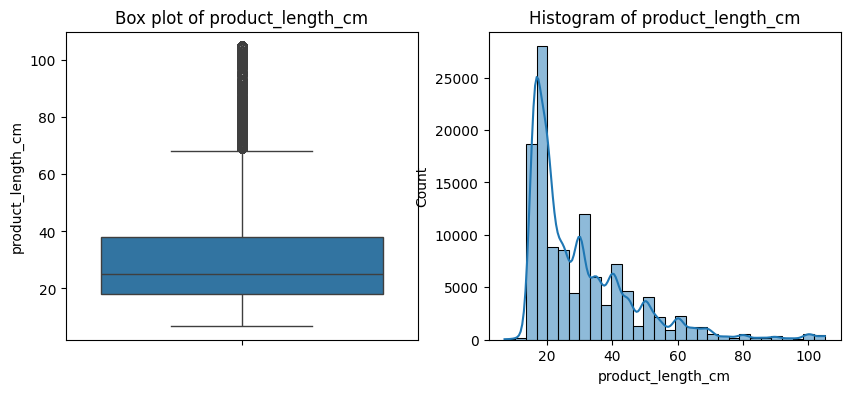

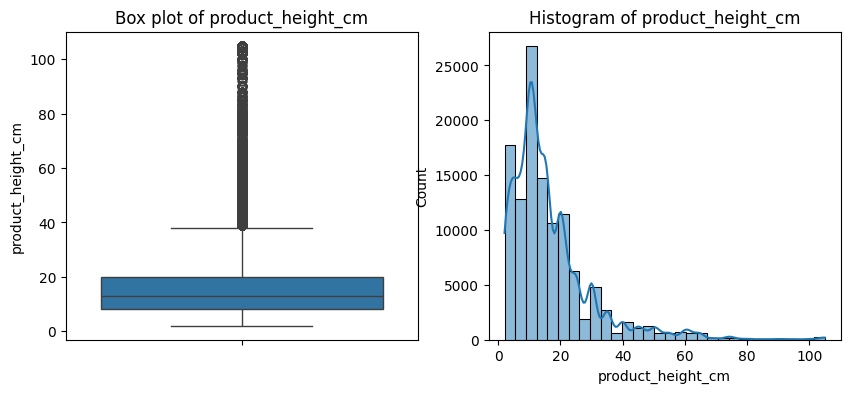

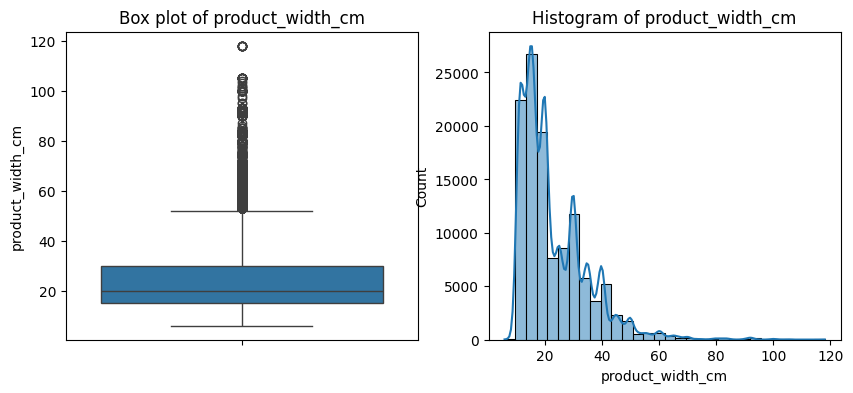

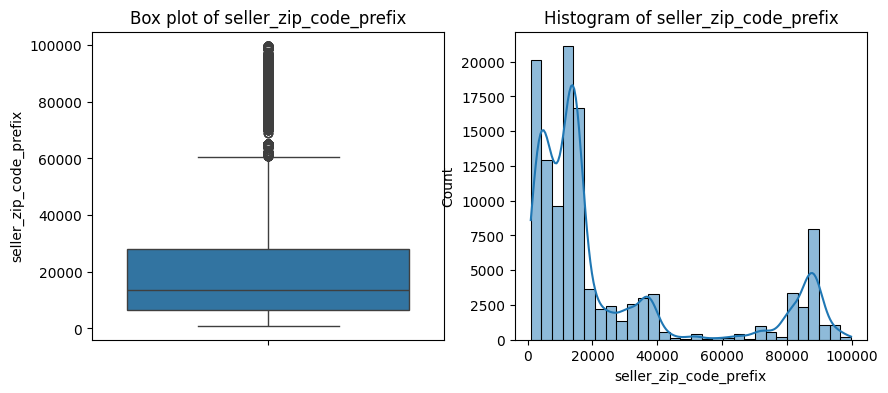

In [11]:
# Visualising the Distributions
import matplotlib.pyplot as plt
import seaborn as sns

for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(y=final_dataset[column])
    plt.title(f'Box plot of {column}')

    plt.subplot(1, 2, 2)
    sns.histplot(final_dataset[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    
    plt.show()

In [12]:
def cap_outliers(df, column):
    lower_cap = df[column].quantile(0.01)
    upper_cap = df[column].quantile(0.99)
    df[column] = np.where(df[column] < lower_cap, lower_cap, df[column])
    df[column] = np.where(df[column] > upper_cap, upper_cap, df[column])
    return df


In [13]:
# List of numerical columns to cap
columns_to_cap = ['price', 'freight_value', 'payment_sequential', 'payment_installments', 'payment_value', 
                  'review_score', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 
                  'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

# Apply capping to each column
for column in columns_to_cap:
    final_dataset = cap_outliers(final_dataset, column)

# Verify the capping by printing summary statistics
final_dataset[columns_to_cap].describe()


,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,118287.000000,118287.000000,118287.000000,118287.000000,118287.000000,117309.000000,118287.000000,118287.000000,118287.000000,118287.000000,118287.000000,118287.000000,118287.000000
mean,115.315829,19.685636,1.057301,2.925529,165.513234,4.031404,48.830615,780.219060,2.171667,2054.080989,30.215882,16.457574,22.947222
std,136.969796,12.906900,0.287537,2.706780,189.682817,1.387930,9.856674,633.940541,1.637875,3448.526771,15.901111,12.677270,11.165901
min,9.990000,4.480000,1.000000,1.000000,7.320000,1.000000,21.000000,86.000000,1.000000,75.000000,16.000000,2.000000,11.000000
25%,39.900000,13.080000,1.000000,1.000000,60.850000,4.000000,43.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,74.900000,16.280000,1.000000,2.000000,108.200000,5.000000,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,134.900000,21.180000,1.000000,4.000000,189.290000,5.000000,57.000000,977.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,895.000000,84.942800,3.000000,10.000000,1217.858400,5.000000,63.000000,3402.000000,8.000000,18600.000000,95.000000,65.000000,62.000000


# EDA

In [14]:
# Summary statistics for numerical features
print(final_dataset.describe())

# Summary statistics for categorical features
print(final_dataset.describe(include=['O']))


            order_purchase_timestamp              order_approved_at  \
count                         118287                         118287   
mean   2017-12-30 07:46:56.982720256  2017-12-30 19:18:34.275989760   
min              2016-09-04 21:15:19            2016-10-04 09:43:32   
25%       2017-09-11 16:22:43.500000            2017-09-12 04:35:28   
50%              2018-01-18 00:00:32            2018-01-18 11:55:05   
75%       2018-05-03 16:45:11.500000            2018-05-04 00:12:45   
max              2018-09-03 09:06:57            2018-09-03 17:40:06   
std                              NaN                            NaN   

        order_delivered_carrier_date  order_delivered_customer_date  \
count                         118287                         118287   
mean   2018-01-03 15:08:56.542434816  2018-01-13 09:09:21.839272448   
min              2016-10-08 10:34:01            2016-10-11 13:46:32   
25%              2017-09-15 21:27:38            2017-09-27 18:26:52   
50%  

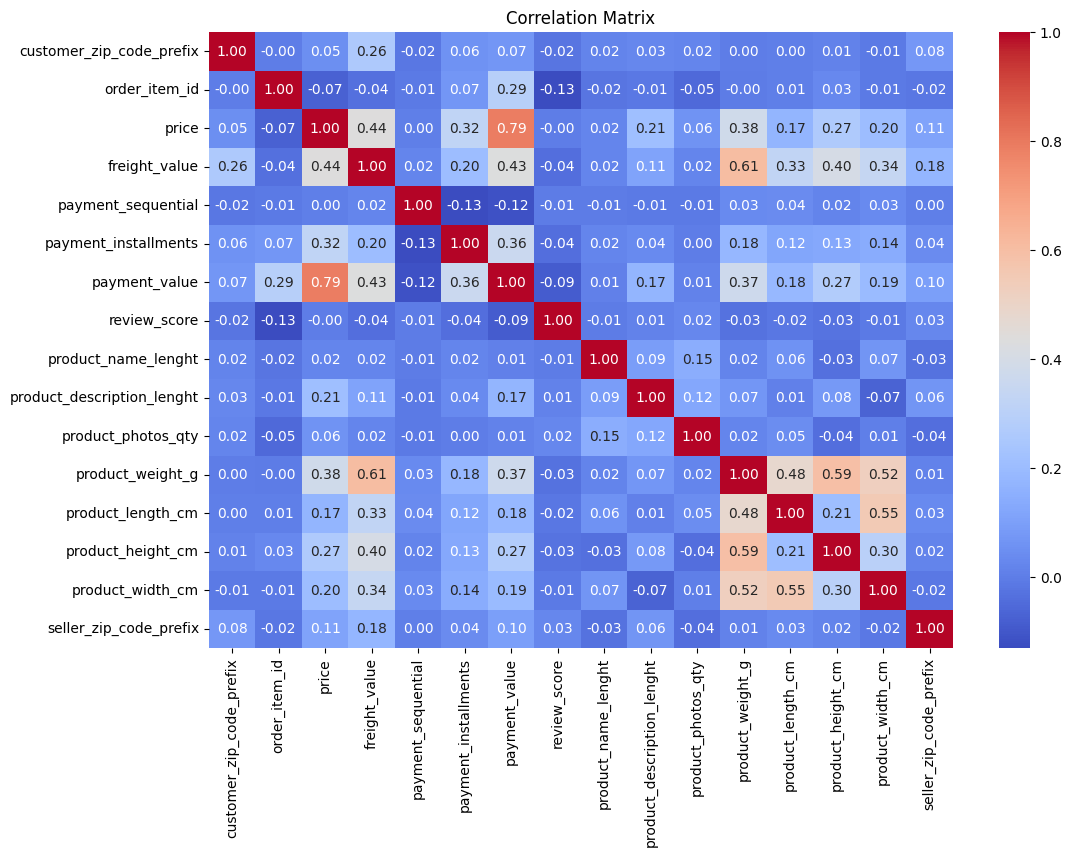

In [15]:
# Correlation matrix
correlation_matrix = final_dataset[numerical_columns].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


### High Correlation Between Payment Value and Price
The correlation matrix shows a strong positive correlation between `payment_value` and `price` (0.79). This indicates that as the price of a product increases, the payment value also increases. It is an expected result but confirms that higher-priced items contribute significantly to revenue.

### Moderate Correlation Between Freight Value and Price
The `freight_value` (shipping cost) has a moderate positive correlation with `price` (0.44). This suggests that more expensive products tend to have higher shipping costs.

### Correlation Within Product Dimensions
The dimensions of the products (`product_length_cm`, `product_height_cm`, `product_width_cm`, and `product_weight_g`) show significant correlations among themselves. This is intuitive as the size and weight of a product are related attributes.

### Low Correlation Between Review Score and Other Features
The `review_score` has low or negative correlations with most other features. This suggests that customer satisfaction (as measured by review scores) does not directly relate to other numerical features in the dataset.


# Customer Behavior Analysis

In [16]:
# Identify high-value customers
high_value_threshold = final_dataset['payment_value'].quantile(0.90)
high_value_customers = final_dataset[final_dataset['payment_value'] > high_value_threshold]

# Summary statistics for high-value customers
high_value_summary = high_value_customers.groupby('customer_unique_id').agg({
    'payment_value': 'sum',
    'recency_days': 'mean',
    'order_id': 'count'
}).rename(columns={'payment_value': 'Total Payment Value', 'recency_days': 'Average Recency', 'order_id': 'Order Frequency'}).reset_index()

print("High-Value Customers Summary:")
print(high_value_summary.describe())

# Visualization of spending patterns
plt.figure(figsize=(10, 6))
sns.histplot(high_value_summary['Total Payment Value'], bins=30, kde=True)
plt.title('Spending Patterns of High-Value Customers')
plt.xlabel('Total Payment Value')
plt.ylabel('Frequency')
plt.show()


KeyError: "Column(s) ['recency_days'] do not exist"

### Spending Patterns of High-Value Customers
The visualization shows that most high-value customers have spent less than $5000, with a few outliers spending significantly more.


In [ ]:
# Refined Spending Patterns Visualization
plt.figure(figsize=(10, 6))
sns.histplot(high_value_summary['Total Payment Value'], bins=50)
plt.title('Refined Spending Patterns of High-Value Customers')
plt.xlabel('Total Payment Value')
plt.ylabel('Frequency')
plt.yscale('log')  # Using log scale for better visualization
plt.show()


### Potential Targeting
The outliers who spend a lot might be targeted for exclusive offers or premium services, as they represent a valuable segment of the customer base.


In [ ]:
# Calculate the threshold for high-spending outliers (e.g., 95th percentile)
high_spending_threshold = high_value_summary['Total Payment Value'].quantile(0.95)

# Filter customers based on the threshold
high_spending_outliers = high_value_summary[high_value_summary['Total Payment Value'] > high_spending_threshold]

# Generate the list of high-spending outliers
high_spending_outliers_list = high_spending_outliers[['customer_unique_id', 'Total Payment Value', 'Average Recency', 'Order Frequency']]

# Display the list of high-spending outliers
from IPython.display import display
display(high_spending_outliers_list)

In [ ]:
# Spending patterns by customer state
state_spending = final_dataset.groupby('customer_state').agg({'payment_value': 'sum'}).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='payment_value', y='customer_state', data=state_spending.sort_values(by='payment_value', ascending=False))
plt.title('Total Payment Value by Customer State')
plt.xlabel('Total Payment Value')
plt.ylabel('Customer State')
plt.show()


In [ ]:
# Average Spending per Order 
avg_spending_order = final_dataset.groupby('order_id').agg({'payment_value': 'sum'}).reset_index()
plt.figure(figsize=(10, 6))
sns.histplot(avg_spending_order['payment_value'], bins=50, kde=True)
plt.title('Average Spending per Order')
plt.xlabel('Payment Value')
plt.ylabel('Frequency')
# plt.yscale('log')  # Using log scale for better visualization
plt.xlim(0, 2000)  # Zooming in on the lower range of payment values
plt.show()


### Most Orders Have Low Spending

The majority of the orders have a low payment value, clustered between 0 and 500 dollars. This indicates that most customers tend to make smaller purchases.

# Product Performance Analysis

In [ ]:
# Total Sales by Product Category
total_sales_by_category = final_dataset.groupby('product_category_name')['payment_value'].sum().reset_index()
total_sales_by_category = total_sales_by_category.sort_values(by='payment_value', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(data=total_sales_by_category, x='payment_value', y='product_category_name', palette='viridis')
plt.title('Total Sales by Product Category')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')

# Adding values on the bars
for index, value in enumerate(total_sales_by_category['payment_value']):
    plt.text(value, index, f'{value:.0f}', va='center')

plt.show()

### Insight
The bar chart shows the top 20 product categories by total sales. 

- Product categories **"cama_mesa_banho," "beleza_saude,"** and **"informatica_acessorios"** are the top-performing categories in terms of sales, with **"cama_mesa_banho"** leading by a significant margin.
- These categories are likely the most popular and lucrative, suggesting that focusing marketing efforts and inventory management on these categories could yield the highest returns.


In [ ]:
# Average Order Value by Product Category
avg_order_value_by_category = final_dataset.groupby('product_category_name')['price'].mean().reset_index()
avg_order_value_by_category = avg_order_value_by_category.sort_values(by='price', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(data=avg_order_value_by_category, x='price', y='product_category_name', palette='viridis')
plt.title('Average Order Value by Product Category (Top 20)')
plt.xlabel('Average Order Value')
plt.ylabel('Product Category')

# Adding values on the bars
for index, value in enumerate(avg_order_value_by_category['price']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.show()


### Insight
The bar chart shows the average order value by product category for the top 20 categories.

- Product categories **"pcs," "portateis_casa_forno_e_cafe,"** and **"eletrodomesticos_2"** have the highest average order values, with **"pcs"** leading significantly at approximately 793.34.
- Categories with higher average order values are likely associated with higher-priced items, suggesting that targeting these categories could be beneficial for strategies focused on maximizing revenue per order.


# Operatinal Insights

In [ ]:
# Filter out entries with negative delivery times
final_dataset = final_dataset[final_dataset['delivery_time_days'] >= 0]

# calculate the average delivery time by category after filtering
avg_delivery_time_by_category = final_dataset.groupby('product_category_name')['delivery_time_days'].mean().reset_index()

# Extract top 10 quickest and top 10 most time-consuming delivery times
quickest_delivery_time = avg_delivery_time_by_category.sort_values(by='delivery_time_days').head(10)
most_time_consuming_delivery_time = avg_delivery_time_by_category.sort_values(by='delivery_time_days', ascending=False).head(10)

# Combine the two datasets
combined_delivery_time = pd.concat([quickest_delivery_time, most_time_consuming_delivery_time])

# Plotting the combined delivery times
plt.figure(figsize=(14, 8))
sns.barplot(data=combined_delivery_time, x='delivery_time_days', y='product_category_name', palette='viridis')
plt.title('Average Delivery Time by Product Category (Top 10 Quickest and Most Time-Consuming)')
plt.xlabel('Average Delivery Time (Days)')
plt.ylabel('Product Category')
plt.show()


In [ ]:
# Plotting the distribution of delivery times
plt.figure(figsize=(10, 6))
sns.histplot(final_dataset['delivery_time_days'], bins=30, kde=True)
plt.title('Distribution of Delivery Times')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Frequency')
plt.xlim(0, 60)  # Limiting to a more reasonable range for better visualization
plt.show()


### Distribution of Delivery Times

Majority of orders are delivered within 0 to 30 days, with the highest frequency occurring around 10 to 15 days. This indicates that most customers receive their orders within two weeks. There are fewer orders that take longer than 30 days to be delivered. This information can be used to optimize logistics and improve delivery efficiency.


## Conclusion

This project provided insights into customer behavior, product performance, and operational metrics for an e-commerce dataset. These insights can help improve business strategies and decision-making processes.
